<a href="https://colab.research.google.com/github/Limteckping45/COS30019Assignment2/blob/main/Transfer_Learning_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.figure_factory as ff

# Clone the repository
!git clone "https://github.com/Limteckping45/COS30019Assignment2"
transfer_learning_model = "/content/COS30019Assignment2/TransferLearning_Model.h5"

# Directory paths for the testing dataset
testing_dataset_dir = "/content/COS30019Assignment2/testing_dataset"

# Load the saved model
model = load_model(transfer_learning_model)

# Define image dimensions
image_width, image_height = 224, 224

# Define batch size
batch_size = 32

# Set up data generator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    testing_dataset_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  # No need to shuffle for evaluation
)

# Extract class names from the test generator
class_names = list(test_generator.class_indices.keys())

# Evaluate the model on the testing dataset
evaluation = model.evaluate(test_generator)

# Extract metrics names and values
metrics_names = model.metrics_names
metrics_values = evaluation

# Display evaluation results
print("Evaluation Results:")
for metric, value in zip(metrics_names, metrics_values):
    print(f"{metric}: {value}")

# Predict class labels for the testing dataset
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# True labels
true_labels = test_generator.classes

# Calculate confusion matrix
conf_matrix = tf.math.confusion_matrix(true_labels, predicted_labels).numpy()

# Plot the confusion matrix using Plotly
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=class_names,
    y=class_names,
    colorscale='Blues',
    showscale=True
)

fig.update_layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted Labels'),
    yaxis=dict(title='True Labels')
)

fig.show()

Cloning into 'COS30019Assignment2'...
remote: Enumerating objects: 3559, done.
remote: Counting objects: 100% (1165/1165), done.
remote: Compressing objects: 100% (1149/1149), done.
remote: Total 3559 (delta 31), reused 998 (delta 16), pack-reused 2394
Receiving objects: 100% (3559/3559), 404.56 MiB | 21.64 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Updating files: 100% (3256/3256), done.
Found 1200 images belonging to 12 classes.
38/38 [==============================] - 21s 366ms/step - loss: 0.4207 - accuracy: 0.8842
Evaluation Results:
loss: 0.4207179546356201
accuracy: 0.8841666579246521
38/38 [==============================] - 18s 415ms/step


fatal: destination path 'COS30019Assignment2' already exists and is not an empty directory.
Found 1200 images belonging to 12 classes.
38/38 [==============================] - 28s 621ms/step


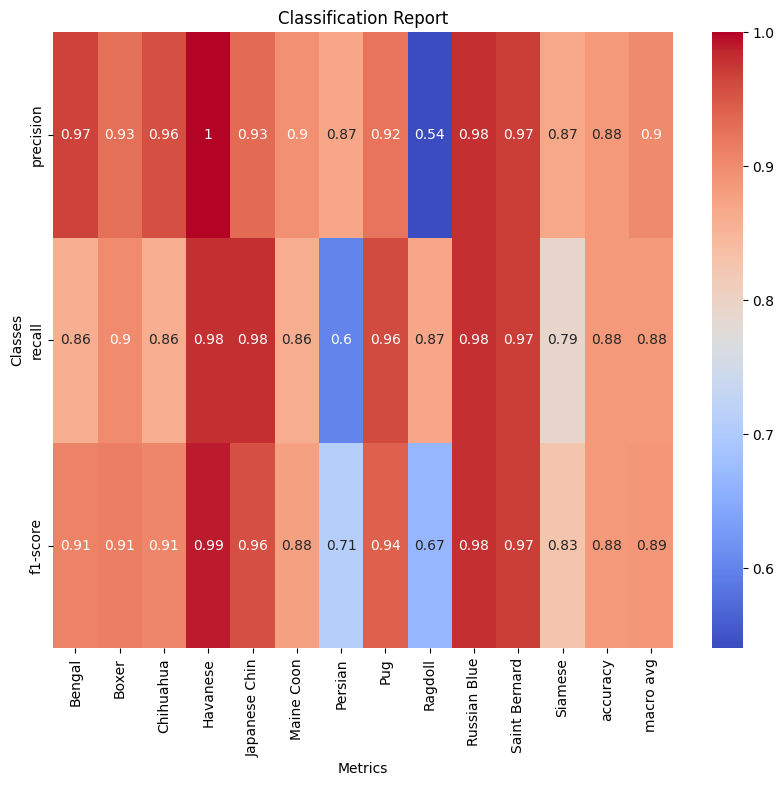

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clone the repository
!git clone "https://github.com/Limteckping45/COS30019Assignment2"
transfer_learning_model = "/content/COS30019Assignment2/TransferLearning_Model.h5"

# Directory paths for the testing dataset
testing_dataset_dir = "/content/COS30019Assignment2/testing_dataset"

# Load the saved model
model = load_model(transfer_learning_model)

# Define image dimensions
image_width, image_height = 224, 224

# Define batch size
batch_size = 32

# Set up data generator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    testing_dataset_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  # No need to shuffle for evaluation
)

# Predict class labels for the testing dataset
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# True labels
true_labels = test_generator.classes

# Generate class labels
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Remove the support column for visualization
report_df = report_df.drop(columns=['support'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="coolwarm", cbar=True)
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()